In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
%matplotlib inline
import itertools
import warnings
import pmdarima as pm
from pmdarima.arima import ADFTest
from pmdarima.arima.utils import ndiffs
plt.style.use('ggplot')

This (p) is called the lag order. It represents the number of prior lag observations we include in the model i.e. 
the number of lags which have a significant correlation with the current observation.

(q) represents the size of the moving window i.e. the number of lag observation errors which have a significant impact 
on the current observation. Its similar to the lag order(p), but it considers errors instead of the observations themselves.

This order of differencing (d) is an important parameter of ARIMA and determines the success of the model.

In [29]:
#Import data from CSV
data = pd.read_csv('data.csv')
foo = data[['date', 'T1']]
t1 = foo[:int(0.85*len(foo['T1']))] #take 85% of training data
t1.head()
#print(int(0.85*len(foo['T1'])))
#print(len(foo['T1']))

date     T1
0  2016-01-11 17:00:00  19.89
1  2016-01-11 17:10:00  19.89
2  2016-01-11 17:20:00  19.89
3  2016-01-11 17:30:00  19.89
4  2016-01-11 17:40:00  19.89

In [30]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(t1['T1'], alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(t1['T1'], alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)
print(kpss_diffs)

1


<Figure size 864x360 with 0 Axes>

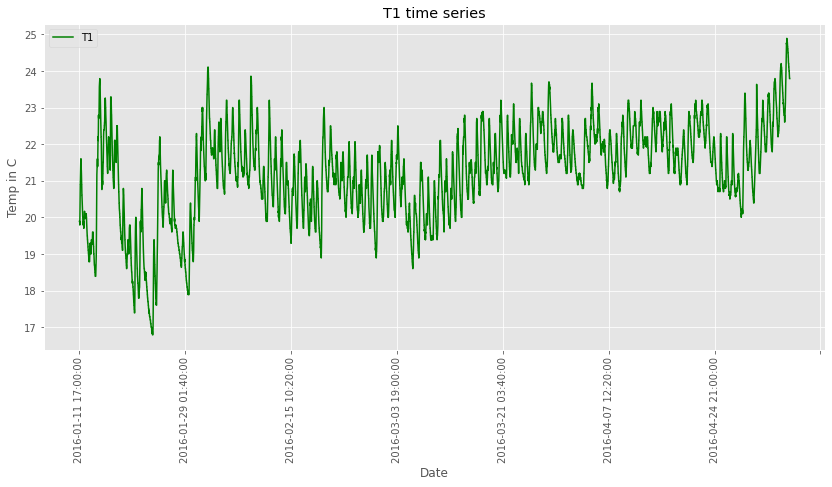

In [31]:
#Visualize T1
plt.figure(figsize=[12, 5]); # Set dimensions for figure
t1.plot(x='date', y='T1', figsize = (14, 6), legend = True, color='g')
plt.title('T1 time series')
plt.ylabel('Temp in C')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

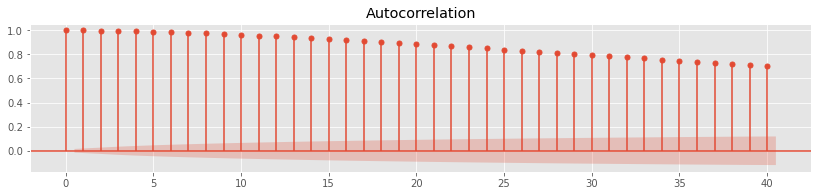

In [32]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(t1['T1'].dropna(),lags=40,ax=ax1)
#ax2 = fig.add_subplot(212)
#fig = sm.graphics.tsa.plot_pacf(t1['T1'].dropna(),lags=40,ax=ax2)

In [33]:
ad_fuller_result = adfuller(t1['T1'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
for key,value in ad_fuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 
    
adft = ADFTest(alpha = 0.05)
adft.is_stationary(t1['T1'])

ADF Statistic: -9.954480722456037
p-value: 2.464897997657875e-17
Critial Values:
   1%, -3.430740116405322
Critial Values:
   5%, -2.8617124159076894
Critial Values:
   10%, -2.5668617725947778


C:\Users\Admin\AppData\Local\Temp/ipykernel_3820/397038919.py:9: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  adft.is_stationary(t1['T1'])


(0.01, False)

In [34]:
t1['T1 First Difference'] = t1['T1'] - t1['T1'].shift(1)
t1.dropna(subset = ["T1 First Difference"], inplace=True)
t1.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_3820/910383637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1['T1 First Difference'] = t1['T1'] - t1['T1'].shift(1)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


date     T1  T1 First Difference
1  2016-01-11 17:10:00  19.89                  0.0
2  2016-01-11 17:20:00  19.89                  0.0
3  2016-01-11 17:30:00  19.89                  0.0
4  2016-01-11 17:40:00  19.89                  0.0
5  2016-01-11 17:50:00  19.89                  0.0

<Figure size 864x360 with 0 Axes>

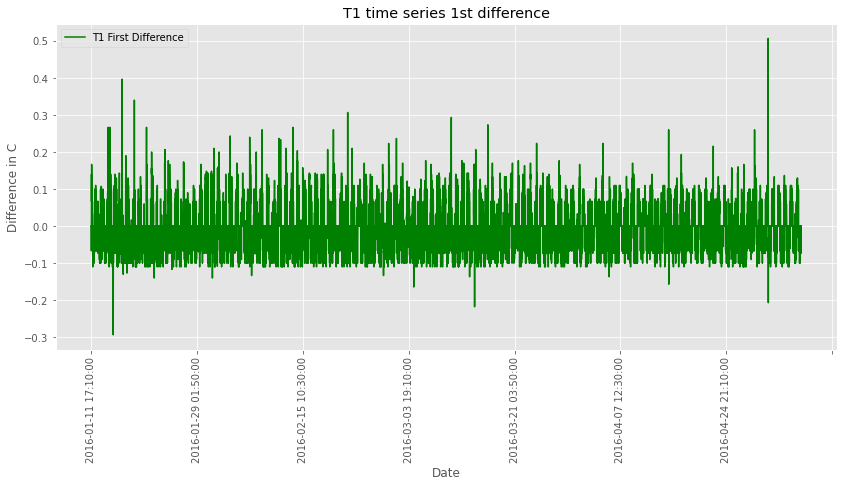

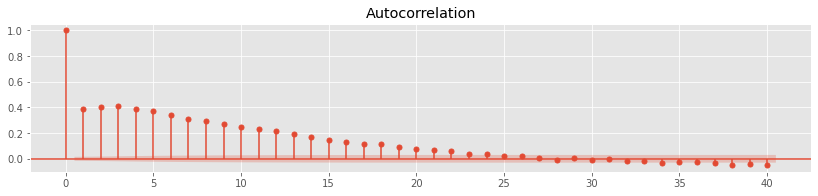

In [35]:
plt.figure(figsize=[12, 5]); # Set dimensions for figure
t1.plot(x='date', y='T1 First Difference', figsize = (14, 6), legend = True, color='g')
plt.title('T1 time series 1st difference')
plt.ylabel('Difference in C')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(t1['T1 First Difference'].dropna(),lags=40,ax=ax1)

In [36]:
ad_fuller_result = adfuller(t1['T1 First Difference'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
for key,value in ad_fuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

    

adft = ADFTest(alpha = 0.05)
adft.should_diff(t1['T1 First Difference'])

ADF Statistic: -20.288217855869092
p-value: 0.0
Critial Values:
   1%, -3.4307409794207975
Critial Values:
   5%, -2.8617127973010312
Critial Values:
   10%, -2.566861975605096


(0.01, False)

C:\Users\Admin\AppData\Local\Temp/ipykernel_3820/2646305586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1['T1 2nd Difference'] = t1['T1 First Difference'] - t1['T1 First Difference'].shift(1)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<Figure size 864x360 with 0 Axes>

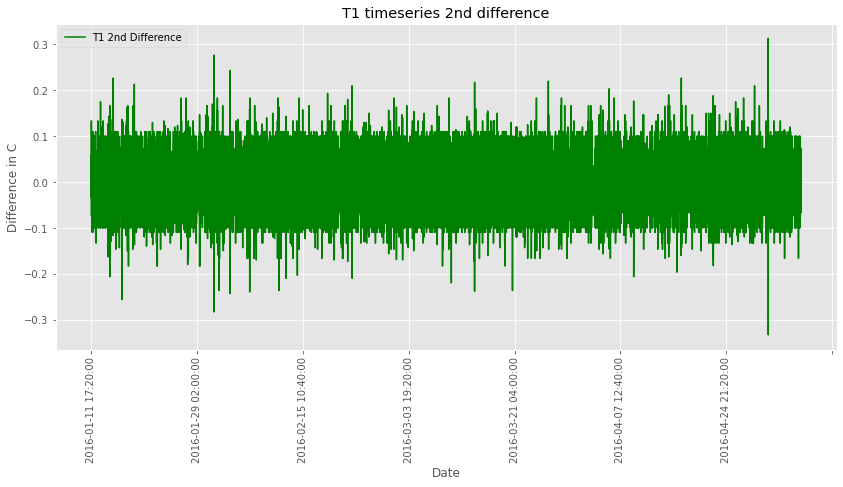

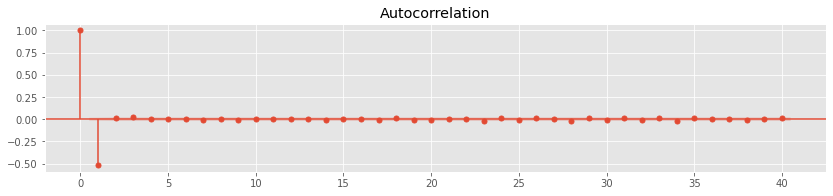

In [37]:
t1['T1 2nd Difference'] = t1['T1 First Difference'] - t1['T1 First Difference'].shift(1)
t1.dropna(subset = ["T1 2nd Difference"], inplace=True)
t1.head()

plt.figure(figsize=[12, 5]); # Set dimensions for figure
t1.plot(x='date', y='T1 2nd Difference', figsize = (14, 6), legend = True, color='g')
plt.title('T1 timeseries 2nd difference')
plt.ylabel('Difference in C')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(t1['T1 2nd Difference'].dropna(),lags=40,ax=ax1)




In [38]:
ad_fuller_result = adfuller(t1['T1 2nd Difference'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
for key,value in ad_fuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

    

adft = ADFTest(alpha = 0.05)
adft.is_stationary(t1['T1 2nd Difference'])

ADF Statistic: -30.14934299603491
p-value: 0.0
Critial Values:
   1%, -3.430740792499472
Critial Values:
   5%, -2.8617127146947015
Critial Values:
   10%, -2.5668619316349055


C:\Users\Admin\AppData\Local\Temp/ipykernel_3820/4250597823.py:11: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  adft.is_stationary(t1['T1 2nd Difference'])


(0.01, False)

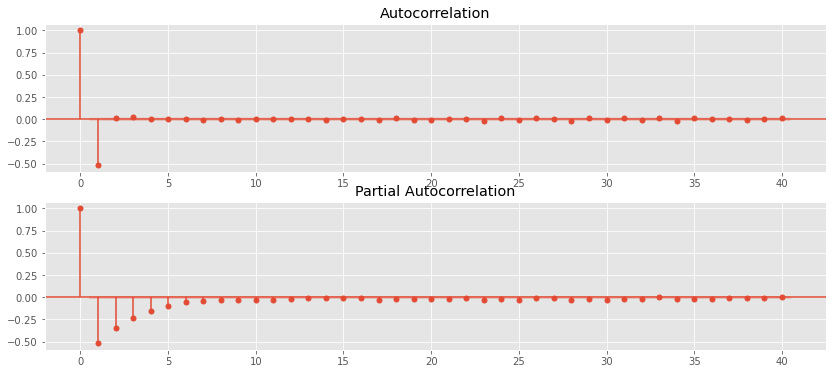

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(t1['T1 2nd Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(t1['T1 2nd Difference'].dropna(),lags=40,ax=ax2)

In [40]:
import pmdarima as pm
#bar = pd.read_csv('data.csv',index_col=0)
#bar = bar[['T1']]
#bar.index = pd.to_datetime(bar.index)
#foo = bar
#foobar = foo[:int(0.85*len(bar['T1']))]

stepwise_model = pm.auto_arima(t1['T1'],seasonal=False,
                           d=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-58301.012, Time=3.51 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-49278.767, Time=1.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-54478.846, Time=0.66 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-58193.135, Time=1.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-49280.767, Time=0.36 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-58257.221, Time=7.90 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-58312.373, Time=7.52 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-58282.284, Time=3.53 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-56660.560, Time=0.85 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-58310.661, Time=11.95 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-57594.746, Time=1.50 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-58308.791, Time=7.37 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-58314.375, Time=2.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-58284.604, Time=2.99 sec
 ARI

In [41]:
best_model = SARIMAX(t1['T1'], order=(2, 2, 0), seasonal_order=(0, 0, 0, 0)).fit(dis=-1)
print(best_model.summary())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                     T1   No. Observations:                16772
Model:               SARIMAX(2, 2, 0)   Log Likelihood               28334.280
Date:                Wed, 09 Feb 2022   AIC                         -56662.560
Time:                        19:17:13   BIC                         -56639.378
Sample:                             0   HQIC                        -56654.911
                              - 16772                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6969      0.006   -125.629      0.000      -0.708      -0.686
ar.L2         -0.3494      0.006    -61.431      0.000      -0.361      -0.338
sigma2         0.0020   1.56e-05    128.118      0.0

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:380: DeprecationWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  warnings.warn('No supported index is available. In the next'


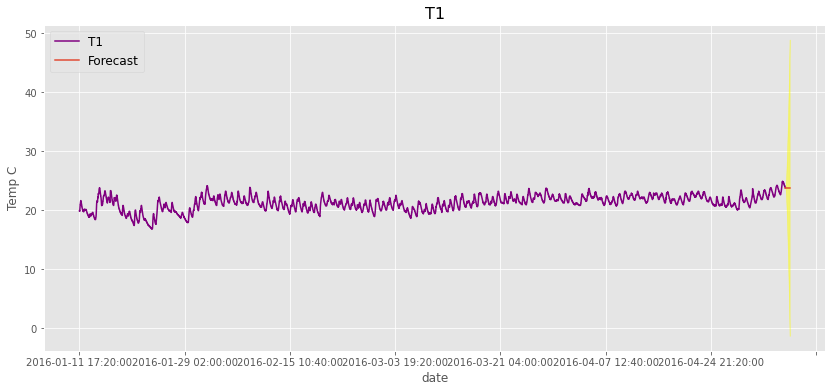

In [44]:
#Forecasting x steps ahead
forecast_values = best_model.get_forecast(steps = 100)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

#Plot the data
ax = t1.plot(x='date', y='T1', figsize = (14, 6), legend = True, color='purple')

#Plot the forecasted values 
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize = (14, 6), grid=True)

#Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='yellow', alpha = .5)
plt.title('T1', size = 16)
plt.ylabel('Temp C', size=12)
plt.legend(loc='upper left', prop={'size': 12})
ax.axes.get_xaxis().set_visible(True)
#annotation
#ax.text(540, 400, 'Forecasted Values ', fontsize=12,  color='red')
plt.show()